In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
df = pd.read_csv("developer_survey_2020/survey_results_public.csv")
df_schema = pd.read_csv("developer_survey_2020/survey_results_schema.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
    display(df_schema)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


In [5]:
#Provide a set of columns with 0 missing values.
no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'Respondent'}

In [6]:
#Provide a set of columns with more than 30% of the values missing
most_missing_cols = set(df.columns[df.isnull().mean() > 0.3])
most_missing_cols

{'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'DatabaseDesireNextYear',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWOnboardGood',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'OrgSize',
 'PurchaseWhat',
 'Sexuality',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WorkWeekHrs'}

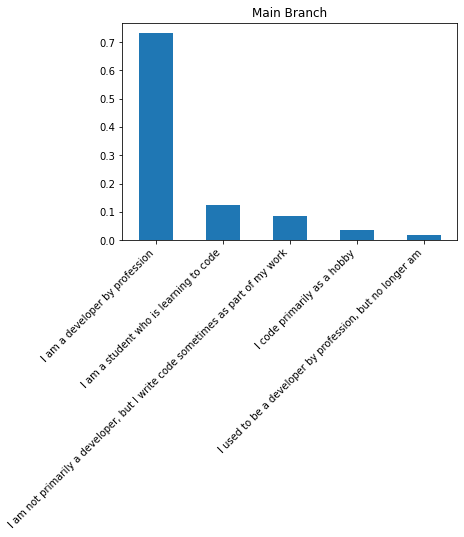

In [7]:
count_vals = df.MainBranch.value_counts()

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Main Branch");

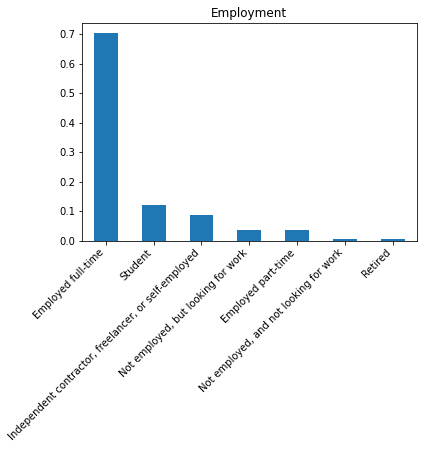

In [8]:
count_vals = df.Employment.value_counts()

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Employment");

In [9]:
df.JobSat.unique()

array(['Slightly satisfied', 'Very dissatisfied', nan,
       'Slightly dissatisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied'], dtype=object)

In [10]:
def mapToScore(x):
    switcher = {
        "Very dissatisfied": 0,
        "Slightly dissatisfied": 1,
        "Neither satisfied nor dissatisfied": 2,
        "Slightly satisfied": 3,
        "Very satisfied": 4,
    }
    if x is not None:
        return switcher.get(x)
    return None
    
df['JobSatScore'] = df.JobSat.apply(lambda x : mapToScore(x))

In [11]:
df.NEWOvertime.unique()

array(['Often: 1-2 days per week or more', nan,
       'Occasionally: 1-2 days per quarter but less than monthly',
       'Never', 'Sometimes: 1-2 days per month but less than weekly',
       'Rarely: 1-2 days per year or less'], dtype=object)

In [12]:
def mapToBucket(x):
    switcher = {
        "Often: 1-2 days per week or more": 4,
        "Sometimes: 1-2 days per month but less than weekly": 3,
        "Occasionally: 1-2 days per quarter but less than monthly": 2,
        "Rarely: 1-2 days per year or less": 1,
        "Never": 0,
    }
    if x is None:
        return None
    else:
        return switcher.get(x)
    
df['OvertimeScore'] = df.NEWOvertime.apply(lambda x: mapToBucket(x))

In [13]:
def mapToBucket(x):
    if x=="Less than 1 year":
        return "Less than 1 year"
    elif x=="More than 50 years":
        return "More than 50 years"
    elif math.isnan(float(x)) or x is None:
        return None
    elif int(x)<=5 and int(x)>=1:
        return "1 to 5 years"
    elif int(x)<=10 and int(x)>=5:
        return "5 to 10 years"
    elif int(x)<=15 and int(x)>=10:
        return "10 to 15 years"
    elif int(x)<=20 and int(x)>=15:
        return "15 to 20 years"
    elif int(x)<=25 and int(x)>=20:
        return "20 to 25 years"
    elif int(x)<=30 and int(x)>=25:
        return "25 to 30 years"
    elif int(x)<=40 and int(x)>=30:
        return "30 to 40 years"
    elif int(x)<=50 and int(x)>=40:
        return "40 to 50 years"
    
df['YearsCodeBucket'] = df.YearsCodePro.apply(lambda x: mapToBucket(x))

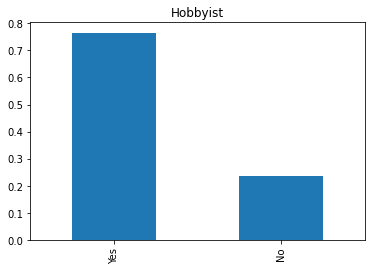

In [14]:
df_devs = df[(df.MainBranch == "I am a developer by profession") & (df.Employment=='Employed full-time')]
count_vals = df_devs.Hobbyist.value_counts()

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df_devs.shape[0]).plot(kind="bar");
plt.title("Hobbyist");

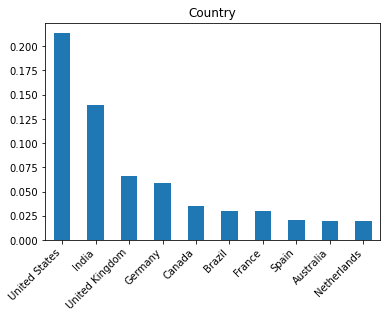

In [15]:
count_vals = df_devs.Country.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df_devs.shape[0]).plot(kind="bar");
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Country");

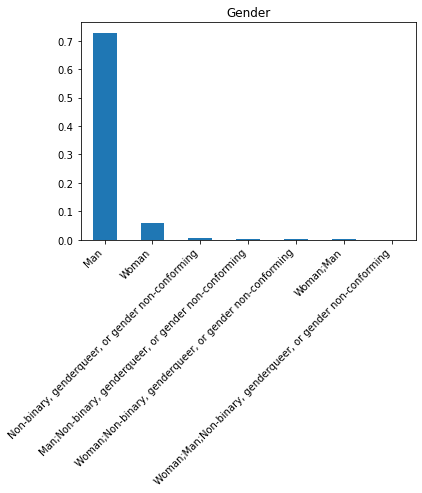

In [16]:
count_vals = df_devs.Gender.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals/df_devs.shape[0]).plot(kind="bar");
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Gender");

<AxesSubplot:ylabel='Frequency'>

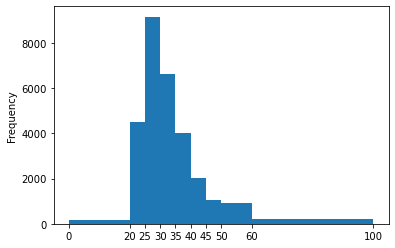

In [17]:
# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

df_devs.Age.plot(kind="hist", bins=[0,20,25,30,35,40,45,50,60,100],xticks=[0,20,25,30,35,40,45,50,60,100])

Gender
Man      AxesSubplot(0.125,0.125;0.775x0.755)
Woman    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

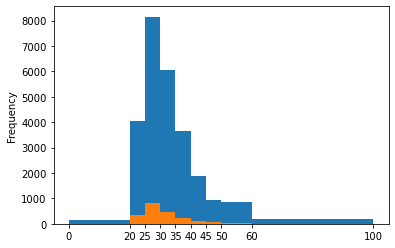

In [18]:
# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

df_devs[df_devs['Gender'].isin(['Man','Woman'])].groupby('Gender').Age.plot(kind="hist", bins=[0,20,25,30,35,40,45,50,60,100],xticks=[0,20,25,30,35,40,45,50,60,100])

In [19]:
df_devs[['JF1','JF2','JF3']] = df_devs.JobFactors.str.split(";", n=2, expand = True)

/Users/olx/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
df_devs_male = df_devs[df_devs['Gender']=="Man"]
df_devs_female = df_devs[df_devs['Gender']=="Woman"]
df_devs_nb = df_devs[~df_devs['Gender'].isin(["Woman","Man"])]

Text(0.5, 1.0, 'Male')

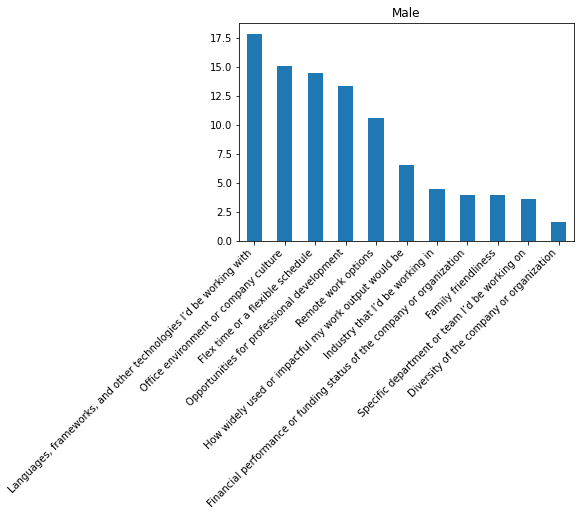

In [21]:
df_JF_male = df_devs_male[['JF1','JF2','JF3']].melt(var_name='columns', value_name='JF')
count_vals = df_JF_male.JF.value_counts()

(count_vals*100/df_JF_male.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Male")

Text(0.5, 1.0, 'Female')

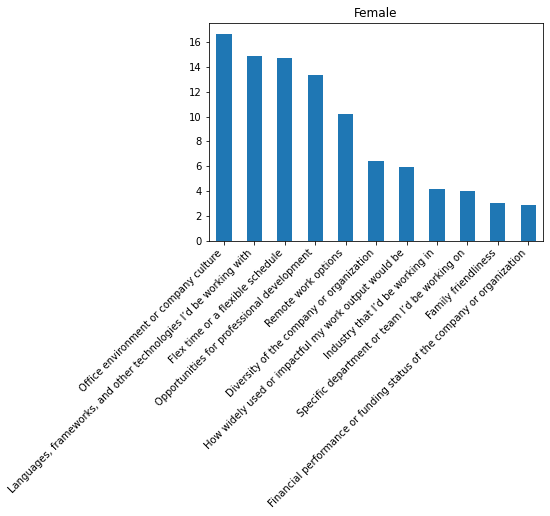

In [22]:
df_JF_female = df_devs_female[['JF1','JF2','JF3']].melt(var_name='columns', value_name='JF')
count_vals = df_JF_female.JF.value_counts()
(count_vals*100/df_JF_female.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Female")

Text(0.5, 1.0, 'India')

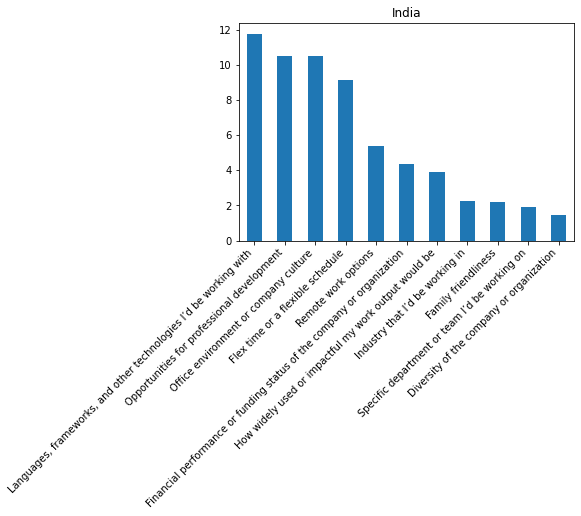

In [23]:
df_JF_india = df_devs[df_devs.Country=='India'][['JF1','JF2','JF3']].melt(var_name='columns', value_name='JF')
count_vals = df_JF_india.JF.value_counts()
(count_vals*100/df_JF_india.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("India")

Text(0.5, 1.0, 'United States')

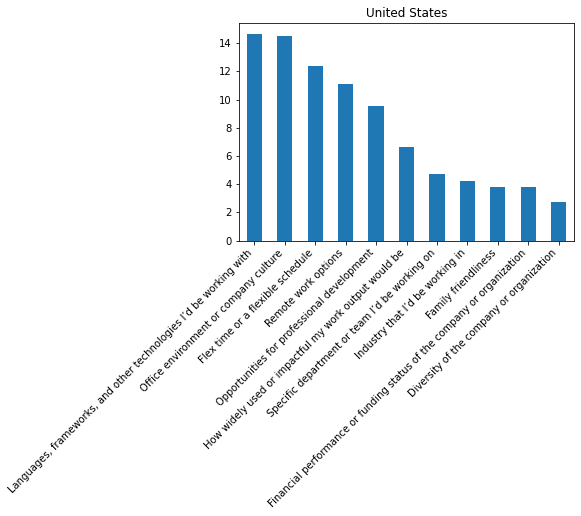

In [24]:
df_JF_us = df_devs[df_devs.Country=='United States'][['JF1','JF2','JF3']].melt(var_name='columns', value_name='JF')
count_vals = df_JF_us.JF.value_counts()
(count_vals*100/df_JF_us.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("United States")

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


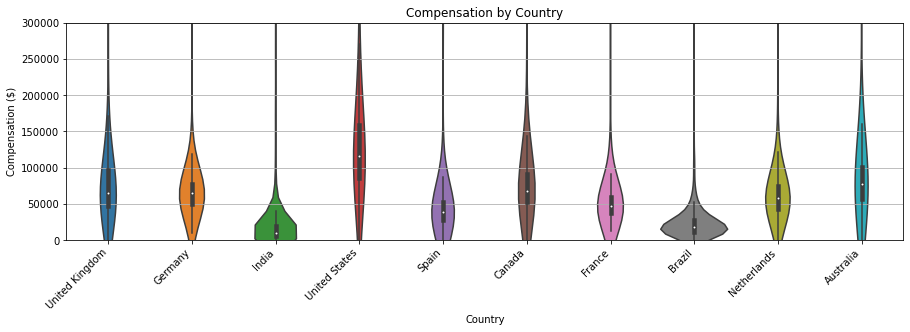

In [25]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('Country','ConvertedComp', data=df_devs[df_devs.Country.isin(df_devs.Country.value_counts()[:10].index)], ax = axes)
axes.set_title('Compensation by Country')

axes.yaxis.grid(True)
axes.set_xlabel('Country')
axes.set_ylabel('Compensation ($)')
fig.set_figwidth(15)
plt.ylim([0,300000])
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


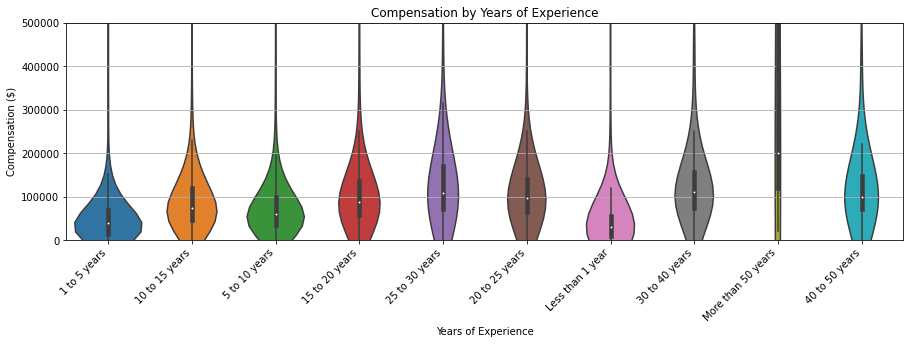

In [26]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('YearsCodeBucket','ConvertedComp', data=df_devs, ax = axes)
axes.set_title('Compensation by Years of Experience')

axes.yaxis.grid(True)
axes.set_xlabel('Years of Experience')
axes.set_ylabel('Compensation ($)')
fig.set_figwidth(15)
plt.ylim([0,500000])
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


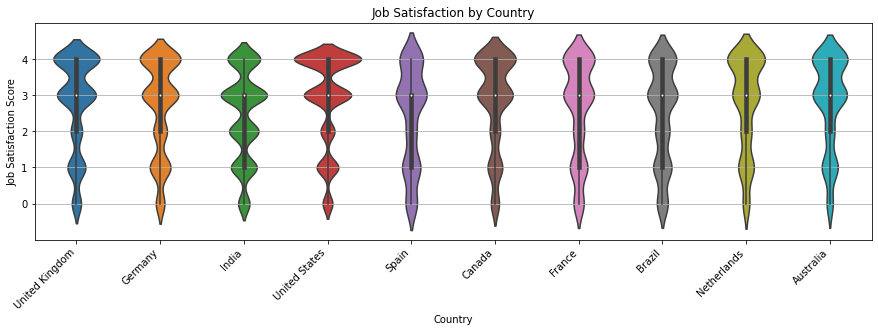

In [27]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('Country','JobSatScore', data=df_devs[df_devs.Country.isin(df_devs.Country.value_counts()[:10].index)], ax = axes)
axes.set_title('Job Satisfaction by Country')

axes.yaxis.grid(True)
axes.set_xlabel('Country')
axes.set_ylabel('Job Satisfaction Score')

fig.set_figwidth(15)

plt.yticks([0,1,2,3,4])
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


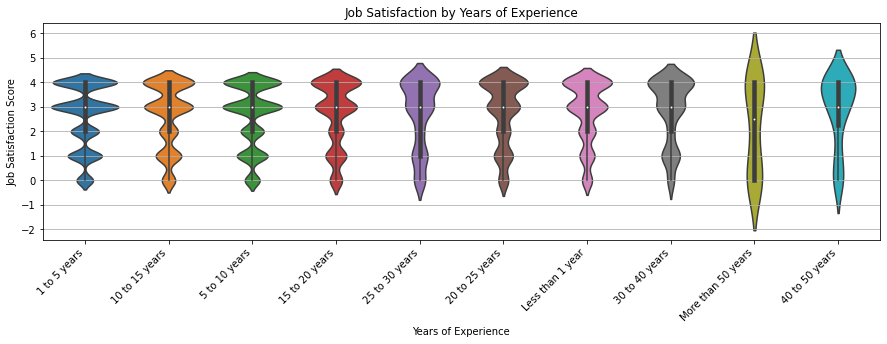

In [28]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('YearsCodeBucket','JobSatScore', data=df_devs, ax = axes)
axes.set_title('Job Satisfaction by Years of Experience')

axes.yaxis.grid(True)
axes.set_xlabel('Years of Experience')
axes.set_ylabel('Job Satisfaction Score')
fig.set_figwidth(15)

plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


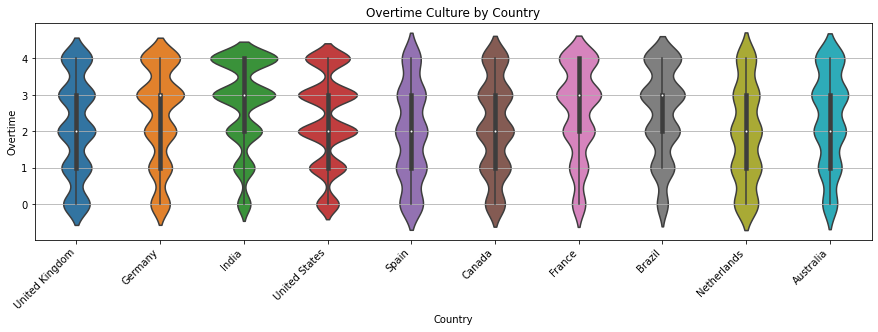

In [29]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('Country','OvertimeScore', data=df_devs[df_devs.Country.isin(df_devs.Country.value_counts()[:10].index)], ax = axes)
axes.set_title('Overtime Culture by Country')

axes.yaxis.grid(True)
axes.set_xlabel('Country')
axes.set_ylabel('Overtime')

fig.set_figwidth(15)
plt.yticks([0,1,2,3,4])
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


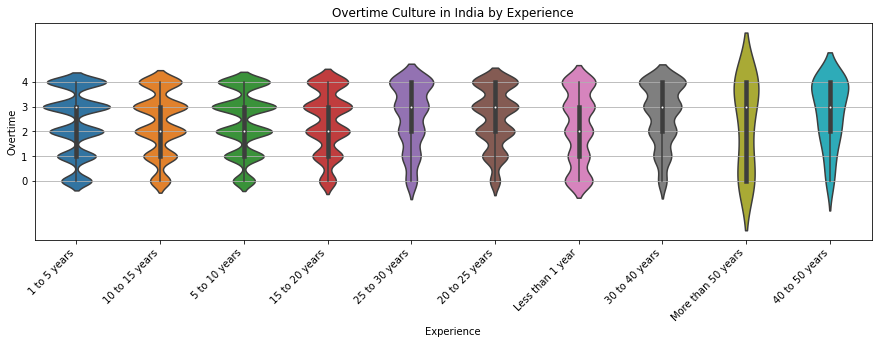

In [44]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('YearsCodeBucket','OvertimeScore', data=df_devs, ax = axes)
axes.set_title('Overtime Culture in India by Experience')

axes.yaxis.grid(True)
axes.set_xlabel('Experience')
axes.set_ylabel('Overtime')

fig.set_figwidth(15)
plt.yticks([0,1,2,3,4])
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


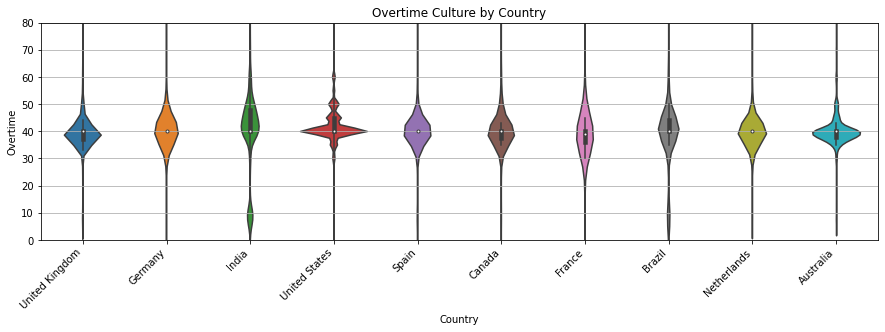

In [31]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('Country','WorkWeekHrs', data=df_devs[df_devs.Country.isin(df_devs.Country.value_counts()[:10].index)], ax = axes)
axes.set_title('Overtime Culture by Country')

axes.yaxis.grid(True)
axes.set_xlabel('Country')
axes.set_ylabel('Overtime')

fig.set_figwidth(15)
plt.ylim([0,80])
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

In [32]:
job_hunt = set()
job_factor_size = []
for index,row in df.iterrows():
    try:
        factors = row['NEWJobHunt'].split(';')
        job_factor_size.append(len(factors))
        for i in factors:
            job_hunt.add(i)
    except:
        None
print(job_hunt)
print(pd.Series(job_factor_size).value_counts())

{'Growth or leadership opportunities', 'Wanting to work with new technologies', 'Trouble with my teammates', 'Wanting to share accomplishments with a wider network', 'Having a bad day (or week or month) at work', 'Better work/life balance', 'Looking to relocate', 'Trouble with my direct manager', 'Better compensation', 'Curious about other opportunities', 'Trouble with leadership at my company', 'Just because'}
4     8720
3     8325
5     7284
2     4998
6     4543
1     3706
7     2475
8     1251
9      584
10     264
11      91
12      45
dtype: int64


In [33]:
df_devs[['JH1','JH2','JH3','JH4','JH5','JH6','JH7','JH8']] = df_devs.NEWJobHunt.str.split(";", n=7, expand = True)

/Users/olx/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Text(0.5, 1.0, 'India')

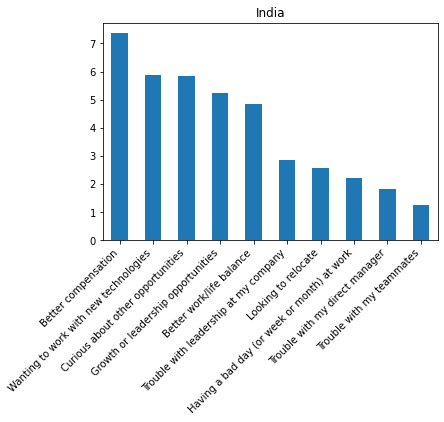

In [45]:
df_JH = df_devs[['JH1','JH2','JH3','JH4','JH5','JH6','JH7','JH8']].melt(var_name='columns', value_name='JH')
count_vals = df_JH.JH.value_counts()

(count_vals[:10]*100/df_JH.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("India")

Text(0.5, 1.0, 'India')

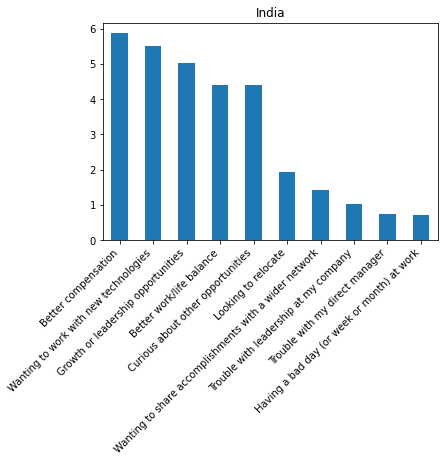

In [34]:
df_JH_india = df_devs[df_devs.Country=='India'][['JH1','JH2','JH3','JH4','JH5','JH6','JH7','JH8']].melt(var_name='columns', value_name='JH')
count_vals = df_JH_india.JH.value_counts()

(count_vals[:10]*100/df_JH_india.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("India")

Text(0.5, 1.0, 'United States')

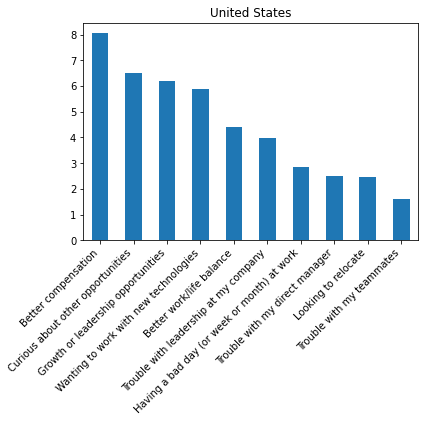

In [35]:
df_JH_india = df_devs[df_devs.Country=='United States'][['JH1','JH2','JH3','JH4','JH5','JH6','JH7','JH8']].melt(var_name='columns', value_name='JH')
count_vals = df_JH_india.JH.value_counts()

(count_vals[:10]*100/df_JH_india.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("United States")

In [36]:
df.NEWJobHuntResearch.unique()

array([nan,
       'Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind);Publicly available financial information (e.g. Crunchbase);Personal network - friends or family',
       'Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind);Personal network - friends or family;Read other media like news articles, founder profiles, etc. about the company',
       'Company reviews from third party sites (e.g. Glassdoor, Blind);Publicly available financial information (e.g. Crunchbase);Personal network - friends or family;Read other media like news articles, founder profiles, etc. about the company',
       'Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind);Publicly available financial information (e.g. Crunchbase);Personal network - friends or family;Read other

In [37]:
job_hunt = set()
job_factor_size = []
for index,row in df.iterrows():
    try:
        factors = row['NEWJobHuntResearch'].split(';')
        job_factor_size.append(len(factors))
        for i in factors:
            job_hunt.add(i)
    except:
        None
print(job_hunt)
print(pd.Series(job_factor_size).value_counts())

{'Directly asking current or past employees at the company', 'Publicly available financial information (e.g. Crunchbase)', 'Read other media like news articles, founder profiles, etc. about the company', 'Personal network - friends or family', 'Read company media, such as employee blogs or company culture videos', 'Company reviews from third party sites (e.g. Glassdoor, Blind)'}
3    12171
2     9616
4     7995
1     4804
5     3980
6     2456
dtype: int64


In [38]:
df_devs[['JHR1','JHR2','JHR3','JHR4','JHR5','JHR6']] = df_devs.NEWJobHuntResearch.str.split(";", n=5, expand = True)

Text(0.5, 1.0, 'Worldwide')

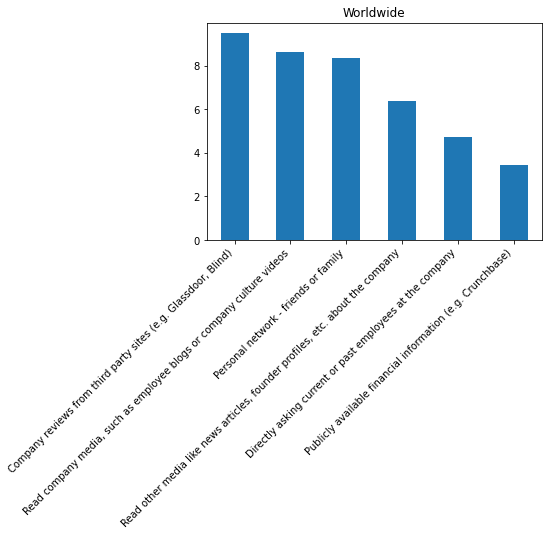

In [43]:
df_JHR = df_devs[['JHR1','JHR2','JHR3','JHR4','JHR5','JHR6']].melt(var_name='columns', value_name='JHR')
count_vals = df_JHR.JHR.value_counts()

(count_vals[:10]*100/df_JHR.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Worldwide")

Text(0.5, 1.0, 'India')

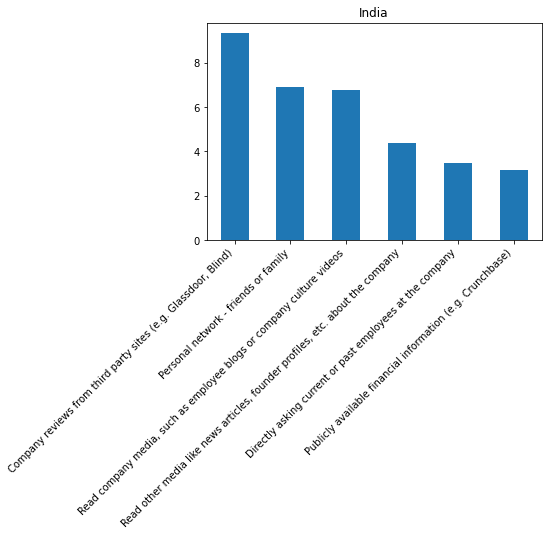

In [39]:
df_JHR_india = df_devs[df_devs.Country=='India'][['JHR1','JHR2','JHR3','JHR4','JHR5','JHR6']].melt(var_name='columns', value_name='JHR')
count_vals = df_JHR_india.JHR.value_counts()

(count_vals[:10]*100/df_JHR_india.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("India")

Text(0.5, 1.0, 'United States')

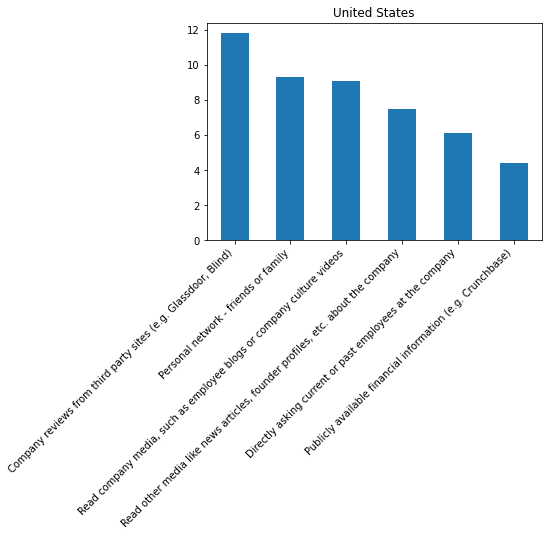

In [40]:
df_JHR_us = df_devs[df_devs.Country=='United States'][['JHR1','JHR2','JHR3','JHR4','JHR5','JHR6']].melt(var_name='columns', value_name='JHR')
count_vals = df_JHR_us.JHR.value_counts()

(count_vals[:10]*100/df_JHR_us.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("United States")